# Getting started with spike-field coherence

In [3]:
# Load modules we'll need.
import numpy as np
import matplotlib.pyplot as plt

# Example: a randomly spiking neuron

To start, let's create a fake spike train for a randomly spiking neuron, and compute the autocovariance and spectrum.

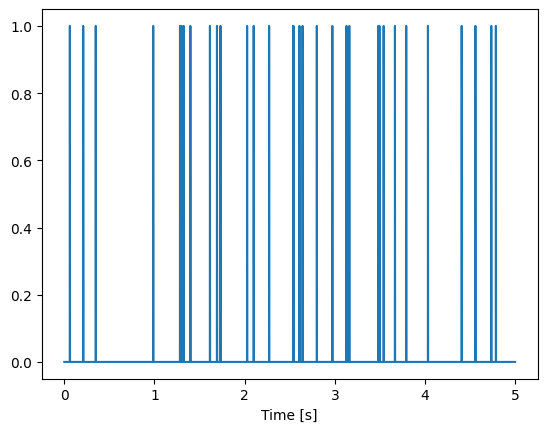

In [4]:
N  = 5000;                          # Number of bins.                   
dt = 0.001;                         # Duration of each bin [s].
T  = N*dt;                          # Total time of observation [s].
tm = np.arange(0,N)*dt;             # Time axis for plotting

lambda0 = 5                         # Average firing rate [Hz]
p0      = lambda0*dt;               # Probability of a spike in a time bin
dn      = np.random.binomial(1,p0,N)# Create the spike train as "coin flips"

plt.plot(tm, dn)                    # Plot it.
plt.xlabel('Time [s]');

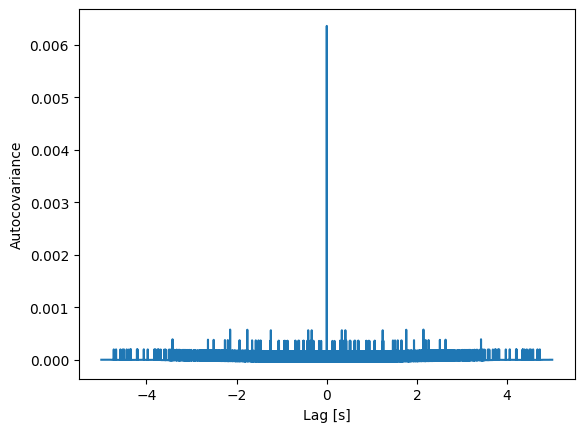

In [5]:
# Compute the autocovariance.

ac_xx = 1 / N * np.correlate(dn-dn.mean(),dn-dn.mean(), 'full')
lags = np.arange(-N + 1, N)                # Create a lag axis,
plt.plot(lags * dt, ac_xx)                 # ... and plot the result.
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');

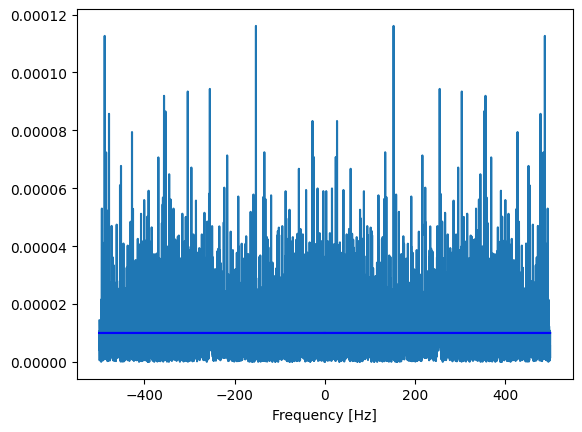

In [6]:
# Compute the spectrum.

Dj = np.fft.fft(dn - dn.mean())            # Compute the FT,
Pj = 2 * dt**2 / T * (Dj * Dj.conj())      # ... and the spectrum.

f = np.fft.fftfreq(N, dt)                         # Create frequency axis.

plt.plot(f, np.real(Pj))                   # Plot the spectrum.
plt.plot(f,2*dt**2*lambda0*np.ones(N), 'b')# And our guess from in-class analysis.
plt.xlabel('Frequency [Hz]');

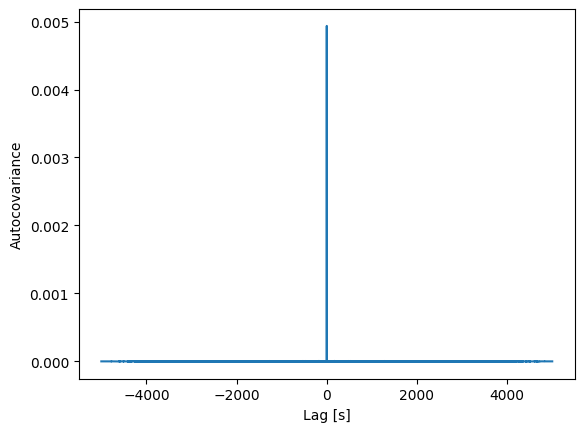

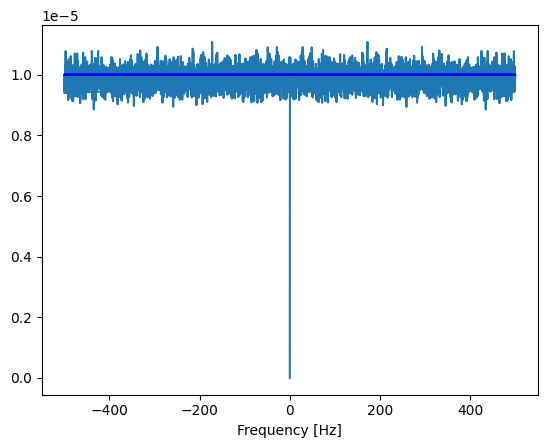

In [7]:
# Repeat the entire simulation many times, and plot the average spectrum

K = 1000
P  = np.zeros([K,np.size(Pj)])
AC = np.zeros([K,2*N-1])
for k in np.arange(K):                          # For each repeat,
    dn = np.random.binomial(1,p0,N)             # ... create a new spike train.
                                                # Compute the AC,
    ac_xx = 1 / N * np.correlate(dn-dn.mean(),dn-dn.mean(), 'full')
    AC[k,:] = ac_xx                             # ... and save the result.
    
    Dj = np.fft.fft(dn - dn.mean())             # Compute the FT,
    Pj = np.real(2*dt**2/T*(Dj*Dj.conj()))      # ... and the spectrum,
    P[k,:] = Pj                                 # ... and save the result.

plt.figure()
plt.plot(lags, np.mean(AC,0))
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');

plt.figure()
plt.plot(f, np.mean(P,0))                      # Plot the spectrum, averaged over repeats
plt.plot(f,2*dt**2*lambda0*np.ones(N), 'b')     # And our guess from in-class analysis.
plt.xlabel('Frequency [Hz]');

# Example: a randomly spiking neuron + refractory period

Now, let's create a fake spike train for a randomly spiking neuron with a refractory period, and compute the autocovariance and spectrum.

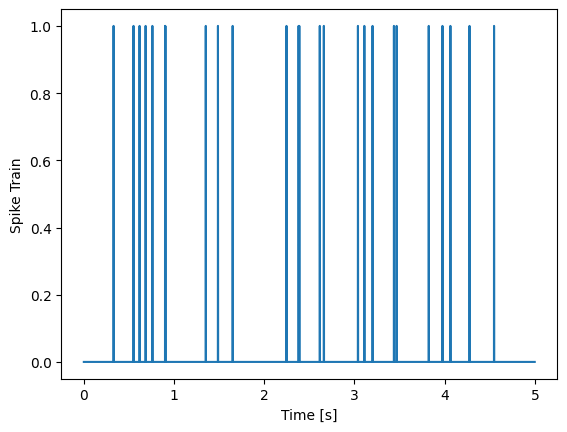

In [25]:
N  = 5000;                          # Number of bins.                   
dt = 0.001;                         # Duration of each bin [s].
T  = N*dt;                          # Total time of observation [s].
tm = np.arange(0,N)*dt;             # Time axis for plotting

lambda0 = 5                         # Average firing rate [Hz]
p0      = lambda0*dt;               # Probability of a spike in a time bin
dn      = np.random.binomial(1,p0,N)# Create the spike train as "coin flips"

#add a refractory period
refrac = 50

#the kramer for loop for refrac; simplified
for i in np.arange(N):
    if dn[i] == 1:
        dn[i +2: i+2+refrac]


#my dumbass (very food) for loop
# for i in range(1, N):
   # if dn[i - 1] == 0: #check if spike happened in prev time bin
    #    dn[i] = np.random.binomial(1,p0) #gen probability p0
    #if i >= refrac / dt and dn[i - int(refrac/dt)] == 1:
     #   dn[i] = 0 #the rfrac is added

#autocovariance 

plt.plot(tm, dn) 
#plt.stem(tm, dn, basefmt='k-', linefmt='k-')
plt.xlabel('Time [s]')
plt.ylabel('Spike Train')
plt.show()

#plt.plot(tm, dn)                    # Plot it.
#plt.xlabel('Time [s]');

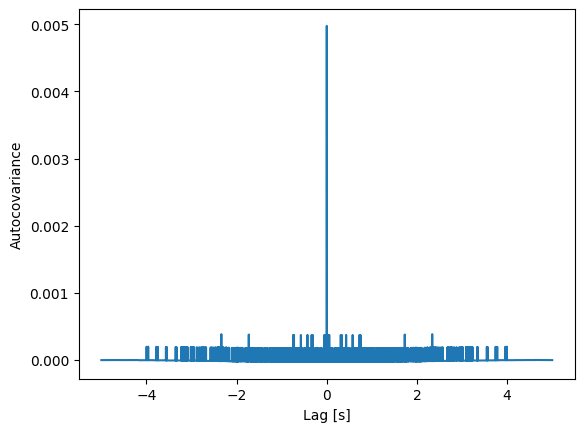

In [9]:
# Compute the autocovariance.

ac_xx = 1 / N * np.correlate(dn-dn.mean(),dn-dn.mean(), 'full')
lags = np.arange(-N + 1, N)                # Create a lag axis,
plt.plot(lags * dt, ac_xx)                 # ... and plot the result.
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');

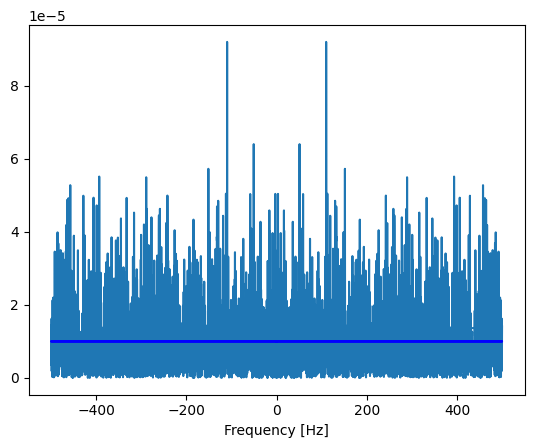

In [10]:
# Compute the spectrum.

Dj = np.fft.fft(dn - dn.mean())            # Compute the FT,
Pj = 2 * dt**2 / T * (Dj * Dj.conj())      # ... and the spectrum.

f = np.fft.fftfreq(N, dt)                         # Create frequency axis.

plt.plot(f, np.real(Pj))                   # Plot the spectrum.
plt.plot(f,2*dt**2*lambda0*np.ones(N), 'b')# And our guess from in-class analysis.
plt.xlabel('Frequency [Hz]');

In [11]:
# Repeat the entire simulation many times, and plot the average spectrum

K = 1000
P  = np.zeros([K,np.size(Pj)])
AC = np.zeros([K,2*N-1])
for k in np.arange(K):                          # For each repeat,
    dn = np.random.binomial(1,p0,N)             # ... create a new spike train.
    
    ???????????????????????????????
    ??? ADD A REFRACTORY PERIOD ???
    ???????????????????????????????
    
                                                # Compute the AC,
    ac_xx = 1 / N * np.correlate(dn-dn.mean(),dn-dn.mean(), 'full')
    AC[k,:] = ac_xx                             # ... and save the result.
    
    Dj = np.fft.fft(dn - dn.mean())             # Compute the FT,
    Pj = np.real(2*dt**2/T*(Dj*Dj.conj()))      # ... and the spectrum,
    P[k,:] = Pj                                 # ... and save the result.

plt.figure()
plt.plot(lags, np.mean(AC,0))
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');

plt.figure()
plt.plot(f, np.mean(P,0))                      # Plot the spectrum, averaged over repeats
plt.plot(f,2*dt**2*lambda0*np.ones(N), 'b')     # And our guess from in-class analysis.
plt.xlabel('Frequency [Hz]');

Object `?????????????????????????????` not found.
Object `? ADD A REFRACTORY PERIOD ???` not found.
Object `?????????????????????????????` not found.
Object `?????????????????????????????` not found.
Object `? ADD A REFRACTORY PERIOD ???` not found.
Object `?????????????????????????????` not found.
Object `?????????????????????????????` not found.
Object `? ADD A REFRACTORY PERIOD ???` not found.
Object `?????????????????????????????` not found.
Object `?????????????????????????????` not found.
Object `? ADD A REFRACTORY PERIOD ???` not found.
Object `?????????????????????????????` not found.
Object `?????????????????????????????` not found.
Object `? ADD A REFRACTORY PERIOD ???` not found.
Object `?????????????????????????????` not found.
Object `?????????????????????????????` not found.
Object `? ADD A REFRACTORY PERIOD ???` not found.
Object `?????????????????????????????` not found.
Object `?????????????????????????????` not found.
Object `? ADD A REFRACTORY PERIOD ???` not found.


KeyboardInterrupt: 

# Analyze an example data set

In [26]:
# Load modules we'll need.
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Load the data and look at it.

**Q.** Do you observe evidence of rhythmic activity? Of spike-field coherence?

### Conclusions

* 
* 

In [29]:
# Load the data.
data = sio.loadmat('spikes-LFP-1.mat')       # Load the multiscale data,
y = data['y']                                # ... get the LFP data,
n = data['n']                                # ... get the spike data,
t = data['t'].reshape(-1)                    # ... get the time axis,
K = np.shape(n)[0]                           # Get the number of trials,
N = np.shape(n)[1]                           # ... and the number of data points in each trial,
dt = t[1]-t[0]                               # Get the sampling interval.

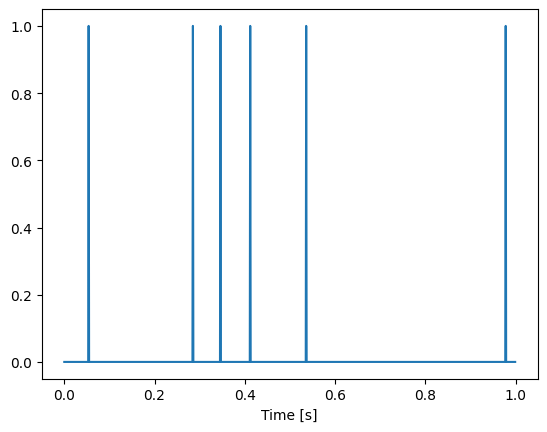

In [32]:
tm = np.arange(0,N)*dt
lambda0 = 5                         # Average firing rate [Hz]
p0      = lambda0*dt;               # Probability of a spike in a time bin
dn      = np.random.binomial(1,p0,N)# Create the spike train as "coin flips"

plt.plot(tm, dn)                    # Plot it.
plt.xlabel('Time [s]');

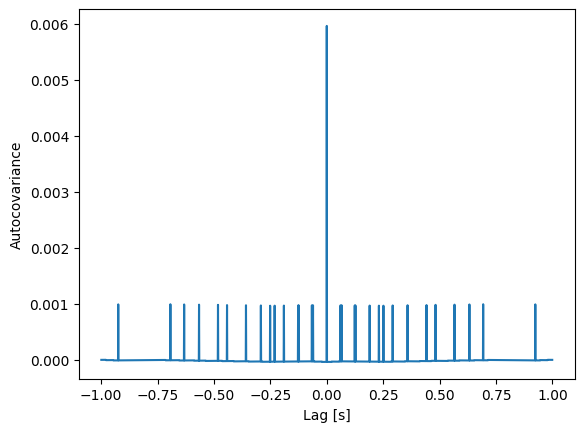

In [33]:
# Compute the autocovariance.
ac_xx = 1 / N * np.correlate(dn-dn.mean(),dn-dn.mean(), 'full')
lags = np.arange(-N + 1, N)                # Create a lag axis,
plt.plot(lags * dt, ac_xx)                 # ... and plot the result.
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');

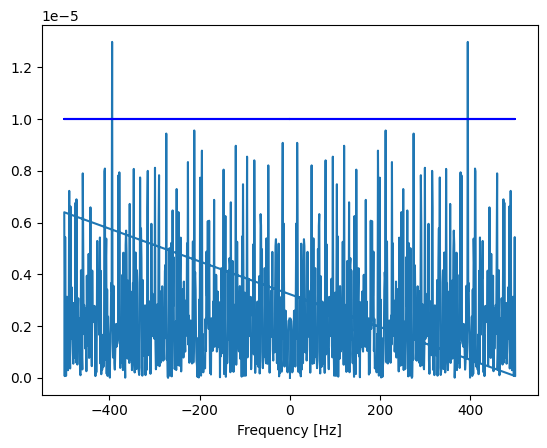

In [34]:
# Compute the spectrum.
Dj = np.fft.fft(dn - dn.mean())            # Compute the FT,
Pj = 2 * dt**2 / T * (Dj * Dj.conj())      # ... and the spectrum.

f = np.fft.fftfreq(N, dt)                         # Create frequency axis.

plt.plot(f, np.real(Pj))                   # Plot the spectrum.
plt.plot(f,2*dt**2*lambda0*np.ones(N), 'b')# And our guess from in-class analysis.
plt.xlabel('Frequency [Hz]');

## Step 2: Compute the trial-averaged (auto-)spectrum for each data type.

**Q.** What rhythms are present in the data?

### Conclusions

* 
* 

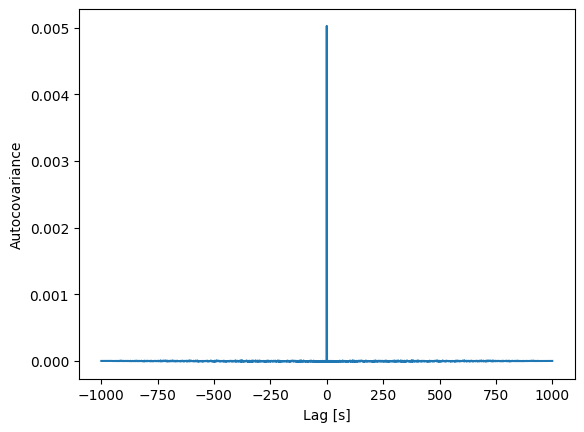

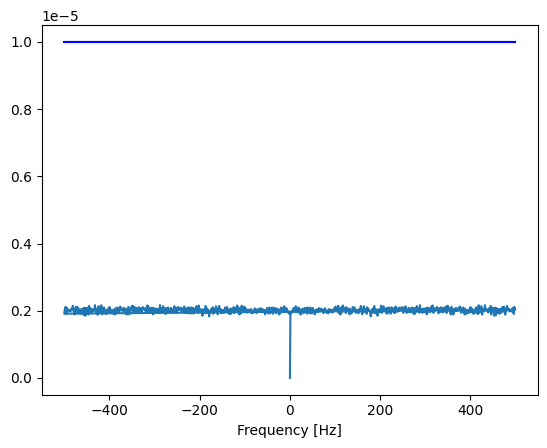

In [35]:
K = 1000
P  = np.zeros([K,np.size(Pj)])
AC = np.zeros([K,2*N-1])
for k in np.arange(K):                          # For each repeat,
    dn = np.random.binomial(1,p0,N)             # ... create a new spike train.
                                                # Compute the AC,
    ac_xx = 1 / N * np.correlate(dn-dn.mean(),dn-dn.mean(), 'full')
    AC[k,:] = ac_xx                             # ... and save the result.
    
    Dj = np.fft.fft(dn - dn.mean())             # Compute the FT,
    Pj = np.real(2*dt**2/T*(Dj*Dj.conj()))      # ... and the spectrum,
    P[k,:] = Pj                                 # ... and save the result.

plt.figure()
plt.plot(lags, np.mean(AC,0))
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');

plt.figure()
plt.plot(f, np.mean(P,0))                      # Plot the spectrum, averaged over repeats
plt.plot(f,2*dt**2*lambda0*np.ones(N), 'b')     # And our guess from in-class analysis.
plt.xlabel('Frequency [Hz]');

## Step 3: Compute the coherence between the two signals.

**Q.** What do you find? Is there evidence of coherence between the two signals?

**Q.** How do the coherence results compare to the spectral results?

### Conclusions

* 
* 